## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve


%matplotlib inline

from warnings import filterwarnings
filterwarnings(action='ignore')

## Loading Dataset

In [3]:
wine = pd.read_csv('data.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


## Description

In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Finding null values

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [7]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


In [8]:
wine.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.450000,0.897500,0.211667,2.666667,0.105333,8.166667,24.500000,0.997682,3.361667,0.550000,9.691667
4,7.809091,0.700000,0.165758,2.566667,0.094788,14.848485,40.606061,0.996669,3.391212,0.637879,10.260606
5,8.161077,0.585280,0.240124,2.540476,0.091770,16.612836,55.299172,0.997073,3.302091,0.613375,9.902277
6,8.317749,0.504957,0.263680,2.444805,0.085281,15.215368,39.941558,0.996610,3.323788,0.676537,10.655339
7,8.851049,0.393671,0.386573,2.760140,0.075217,14.538462,37.489510,0.996071,3.287133,0.743566,11.482634
8,8.806250,0.410000,0.432500,2.643750,0.070187,11.062500,29.375000,0.995553,3.240625,0.766250,11.937500


## Data analysis

### Bar plot

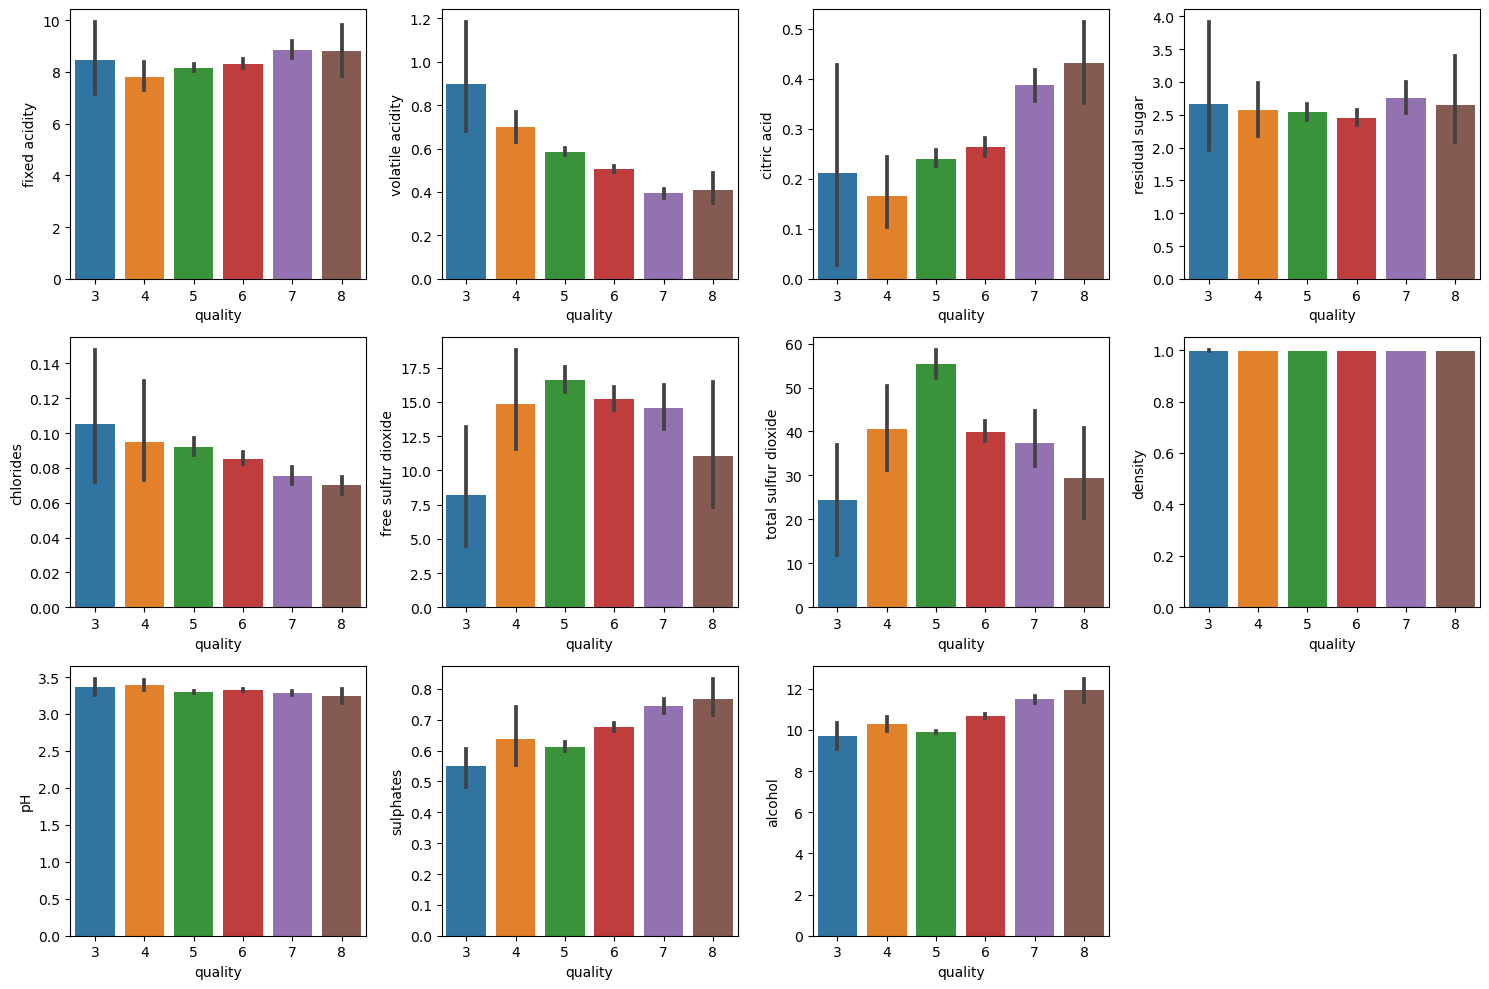

In [9]:
fig = plt.figure(figsize=(15,10))

plt.subplot(3,4,1)
sns.barplot(x='quality',y='fixed acidity',data=wine)

plt.subplot(3,4,2)
sns.barplot(x='quality',y='volatile acidity',data=wine)

plt.subplot(3,4,3)
sns.barplot(x='quality',y='citric acid',data=wine)

plt.subplot(3,4,4)
sns.barplot(x='quality',y='residual sugar',data=wine)

plt.subplot(3,4,5)
sns.barplot(x='quality',y='chlorides',data=wine)

plt.subplot(3,4,6)
sns.barplot(x='quality',y='free sulfur dioxide',data=wine)

plt.subplot(3,4,7)
sns.barplot(x='quality',y='total sulfur dioxide',data=wine)

plt.subplot(3,4,8)
sns.barplot(x='quality',y='density',data=wine)

plt.subplot(3,4,9)
sns.barplot(x='quality',y='pH',data=wine)

plt.subplot(3,4,10)
sns.barplot(x='quality',y='sulphates',data=wine)

plt.subplot(3,4,11)
sns.barplot(x='quality',y='alcohol',data=wine)

plt.tight_layout()


### Histogram

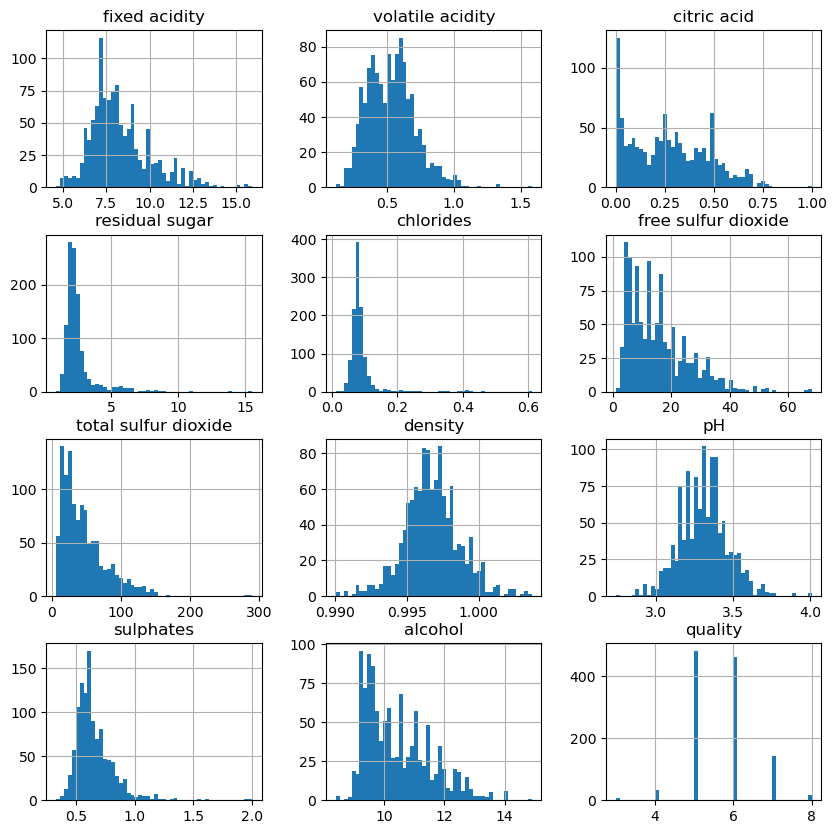

In [10]:
wine.hist(figsize=(10,10),bins=50)
plt.show()

### Heatmap for expressing correlation

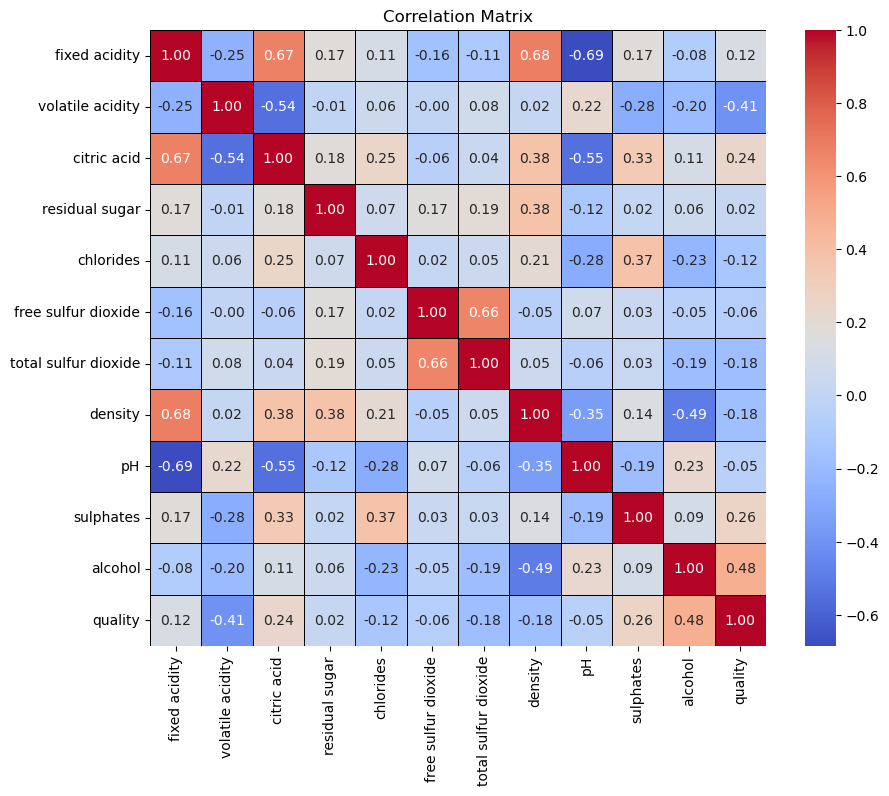

In [11]:
corr = wine.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, linecolor='black', square=True)
plt.title('Correlation Matrix')
plt.show()

## Feature Selection

In [12]:
wine['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [13]:
wine['goodquality'] = [1 if x >= 6 else 0 for x in wine['quality']]
X = wine.drop(['quality','goodquality'], axis = 1)
Y = wine['goodquality']

In [14]:
wine['goodquality'].value_counts()

1    621
0    522
Name: goodquality, dtype: int64

In [15]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


In [16]:
Y

0       0
1       0
2       0
3       1
4       0
       ..
1138    1
1139    1
1140    0
1141    1
1142    0
Name: goodquality, Length: 1143, dtype: int64

## Feature importance

In [17]:


# Initialize the Extra Trees Classifier
model = ExtraTreesClassifier()

# Fit the model to your data
model.fit(X, Y)

# Get feature importances
importances = model.feature_importances_

# Get column names
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Create a DataFrame for the feature ranking
feature_ranking_df = pd.DataFrame({'Feature': feature_names[indices], 'Importance Score': importances[indices]})

# Print the feature ranking as a table
print("Feature ranking:")
print(feature_ranking_df)




Feature ranking:
                 Feature  Importance Score
0                alcohol          0.192894
1              sulphates          0.113565
2       volatile acidity          0.106528
3   total sulfur dioxide          0.101699
4                density          0.076000
5              chlorides          0.072520
6            citric acid          0.070815
7          fixed acidity          0.069591
8                     pH          0.066244
9    free sulfur dioxide          0.065529
10        residual sugar          0.064616


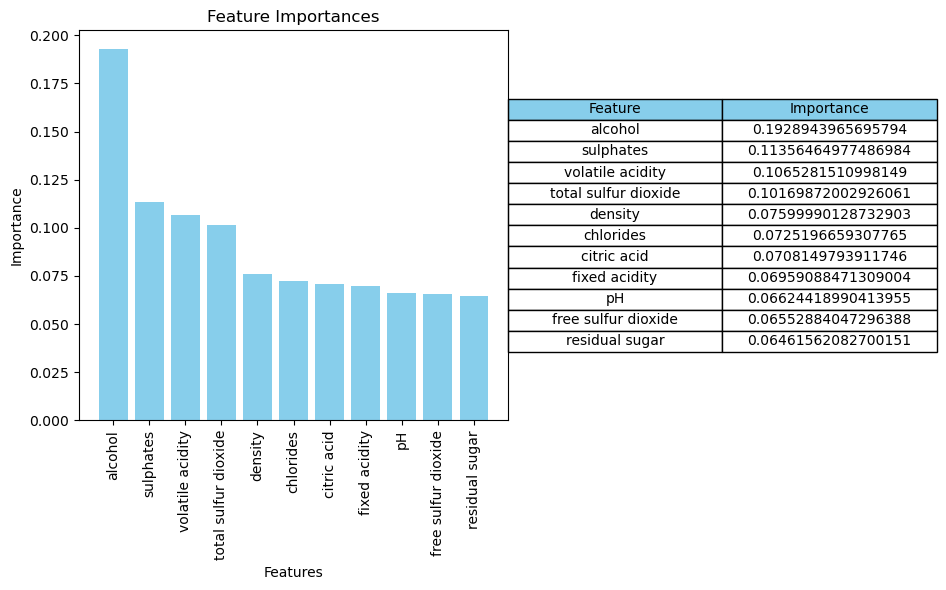

In [18]:

# Sort feature importances and feature names
sorted_feature_importances = [importances[i] for i in indices]
sorted_feature_names = [feature_names[i] for i in indices]

# Plot feature importances
plt.figure(figsize=(15, 6))

# Create bar plot with sky blue color
plt.subplot(1, 2, 1)
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center', color='skyblue')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')

# Create table
table_data = [[sorted_feature_names[i], sorted_feature_importances[i]] for i in range(len(sorted_feature_names))]
table = plt.table(cellText=table_data, colLabels=['Feature', 'Importance'], loc='right', cellLoc='center', colColours=['skyblue']*2)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

plt.tight_layout()
plt.show()


### Model Evaluation

In [19]:
# Select the top 5 features
top_5_features = feature_names[indices][:5]

# Subset the data to include only the top 5 features
X_top_5 = X[top_5_features]

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_top_5, Y, test_size=0.2, random_state=42)

In [20]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=1),
    "knn":KNeighborsClassifier(n_neighbors=3),
    "SVC":SVC(),
    "GaussianNB":GaussianNB(),
    "SGDClassifier":SGDClassifier()
}

In [24]:
for name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)
    
    # Make predictions
    predictions = model.predict(X_test)


    
    # Calculate evaluation metrics
    accuracy = accuracy_score(Y_test, predictions)
    report = classification_report(Y_test, predictions)   
    # Print the evaluation metrics
    print(f"{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(report)
    print(f"Confusion Matrix:")
    cm = confusion_matrix(Y_test, predictions)
    print(cm)
    print("\n")

Logistic Regression:
Accuracy: 0.7598
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       102
           1       0.78      0.79      0.78       127

    accuracy                           0.76       229
   macro avg       0.76      0.76      0.76       229
weighted avg       0.76      0.76      0.76       229

Confusion Matrix:
[[ 74  28]
 [ 27 100]]


Decision Tree:
Accuracy: 0.6856
              precision    recall  f1-score   support

           0       0.64      0.66      0.65       102
           1       0.72      0.71      0.71       127

    accuracy                           0.69       229
   macro avg       0.68      0.68      0.68       229
weighted avg       0.69      0.69      0.69       229

Confusion Matrix:
[[67 35]
 [37 90]]


Random Forest:
Accuracy: 0.7860
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       102
           1       0.81      0.80      0.81       127

### Model Ensembling

Accuracy: 0.7817
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       102
           1       0.79      0.82      0.81       127

    accuracy                           0.78       229
   macro avg       0.78      0.78      0.78       229
weighted avg       0.78      0.78      0.78       229

Confusion Matrix:
[[ 75  27]
 [ 23 104]]




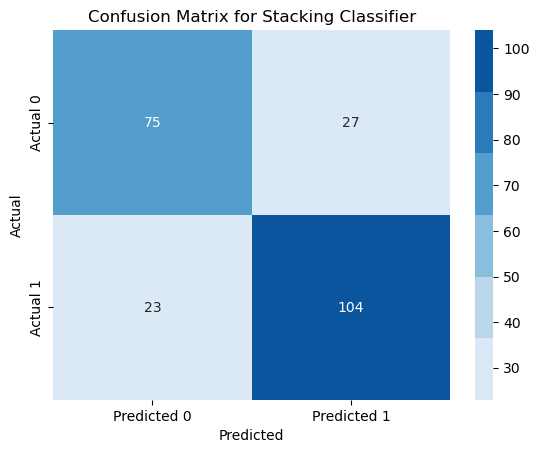

In [25]:
# Select the top-performing models based on accuracy scores
top_models = ["Random Forest", "Logistic Regression", "GaussianNB"]

# Create a list of base estimators for the ensemble
base_estimators = [(name, model) for name, model in models.items() if name in top_models]

# Initialize a StackingClassifier with base estimators and a meta-estimator
stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression())

# Train the StackingClassifier
stacking_clf.fit(X_train, Y_train)

# Make predictions
stacking_preds = stacking_clf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(Y_test, stacking_preds)
report = classification_report(Y_test,stacking_preds )


# Print the evaluation metrics

print(f"Accuracy: {accuracy:.4f}")
print(report)
print(f"Confusion Matrix:")
cm = confusion_matrix(Y_test, stacking_preds)
print(cm)
print("\n")



palette = sns.color_palette("Blues")

# Create the heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap=palette, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Stacking Classifier')
plt.show()

In [23]:
# Define the top 5 features
top_features = ["alcohol", "sulphates", "volatile acidity", "total sulfur dioxide", "density"]

# Take user input for the top 5 features by names
user_input = {}
print("Enter the values for the top 5 features:")
for feature_name in top_features:
    feature_value = float(input(f"Enter value for {feature_name}: "))
    user_input[feature_name] = feature_value

# Create a DataFrame from the user input
user_df = pd.DataFrame([user_input])

# Make prediction using the trained model
prediction = stacking_clf.predict(user_df)

# Determine if the quality is good or bad
quality = "Good" if prediction[0] == 1 else "Bad"

# Print the predicted quality
print(f"The predicted quality is {quality} ({prediction[0]}).")

Enter the values for the top 5 features:
Enter value for alcohol: 5
Enter value for sulphates: 5
Enter value for volatile acidity: 5
Enter value for total sulfur dioxide: 5
Enter value for density: 5
The predicted quality is Bad (0).
